<a href="https://colab.research.google.com/github/CRomanIA/iaInicios/blob/master/miPrimeraRed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles


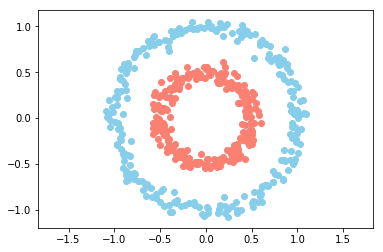

In [0]:
# crear el dataseT
n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [0]:
#clase de la capa de la red neuronal
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

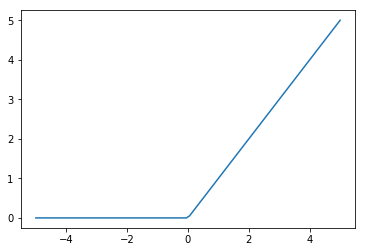

In [0]:
# funciones de activacion
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
#plt.plot(_x, sigm[0](_x)) Para ver el diagrama de sigmoide que se solicita.
plt.plot(_x, relu(_x)) 

In [0]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
#... n capas de manera no iterativa
# crear funcion, gracias a haber creado clase, neural_layer,
# se puede hacer de manera iterativa, como lo veremos.
#crear funcion en base a una variable"topology"
def create_nn(topology, act_f):
#vector que contiene cada una de las capas de la red neuronal  
  nn = []
  
  for l, layer in enumerate(topology[: -1]): #enumerate: te da el indice del vector, como tambien el objeto
    
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
  return nn


In [0]:
#crear variable en funcion a la cantidad de neuronas que tiene la red
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))
  
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  
  out = [(None, X)]
  
  #forward pass
  for l, layer in enumerate(neural_net):
    
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #suma ponderada en primera capa
    a = neural_net[l].act_f[0](z) #salida de la capa1
  
    out.append((z, a))
  
  #print(l2_cost[0](out[-1][1], Y))
  
  if train:
      
    #Backward pass
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      #print(a.shape)
      if l == len(neural_net) - 1:
        #Calcular delta ultima capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
        #print(deltas.shape)
      else:
        #print(deltas[0].shape, _w.shape)
        #back propagation
        #Calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _w.T  * neural_net[l].act_f[1](a))
        
      _w = neural_net[l].W
        #Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
      
  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)
print("")

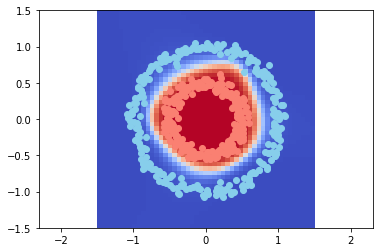

In [0]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []
  
for i in range(2500):
  
  #Entrenemos la red neuronal
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
    
  if i % 25 == 0:
    
    print(pY)
      
    loss.append(l2_cost[0](pY, Y))
      
    res = 50
      
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res) 
      
    _Y = np.zeros((res, res))
      
    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
        
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")
      
    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
      
    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)